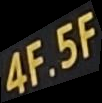

257


In [4]:
from pathlib import Path
from PIL import Image
from IPython.display import display, clear_output

path = "/home/labelsets/sangmu_str_only_test/test_label.txt"
with open(path) as f:
    lines = [l.rstrip("\n").split("\t") for l in f.readlines()]

mark = [None for i in range(len(lines))]


In [27]:
def show(img, fit):
    w, h = img.size
    if w > h:
        h = int(h*fit/w)
        w = fit
    else:
        w = int(w*fit/h)
        h = fit
    img = img.resize((w, h))
    img.show()

4425


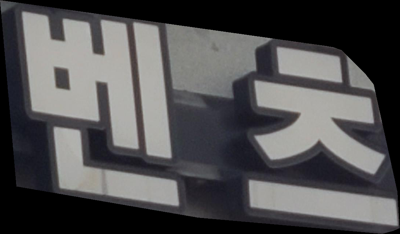

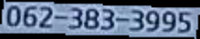

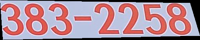

In [66]:
start=4424

for i, (path, label) in enumerate(lines):
    if i < start:
        continue
    print(i)
    show(Image.open(Path("/home/datasets/")/path), 400)

    for j in range(i+1, i+3):
        show(Image.open(Path("/home/datasets/")/lines[j][0]), 200)
    for j in range(i+3, i+5):
        show(Image.open(Path("/home/datasets/")/lines[j][0]), 150)
    
    a = input()
        
        
    if a == "":
        mark[i] = "regular"
    elif a == "1":
        mark[i] = "irregular"
    elif a == "stop":
        break
        
    clear_output(wait=True)       

In [74]:
import json
with open("mark.txt", "w") as f:
    f.write(json.dumps(mark))

In [77]:
with open("mark.txt", "r") as f:
    mark = json.load(f)


In [69]:
with open("regular.txt", "w") as r_f:
    with open("irregular.txt", "w") as ir_f:
        for i, (path, label) in enumerate(lines):
            if mark[i] == "regular":
                r_f.write(f"{path}\t{label}\n")
            elif mark[i] == "irregular":
                ir_f.write(f"{path}\t{label}\n")
            else:
                print(i)     
    

In [80]:
print(mark.count("regular"))
print(mark.count("irregular"))

4175
1364
